In [1]:
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from dimension_reduction import DimensionReduction
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,D_0,-166.792114,48.673981,-61.681690,23.588770,-24.922943,-22.071186,-25.099222,-14.969215,-22.405672,...,0.198428,0.025338,0.153881,0.046216,0.057083,0.014590,0.019117,0.136555,2436.000953,229407.109103
1,D_0,-196.336411,137.743591,-30.724380,35.839794,-24.167620,8.170997,-8.422764,6.116524,-9.430403,...,0.102050,0.077792,0.051169,0.093380,0.070790,0.105666,0.014385,0.117292,1553.866767,127935.952433
2,D_0,-255.626404,97.742905,-91.593735,4.170034,-29.750544,-26.448723,-19.965393,-17.997416,-1.946816,...,0.034188,0.136815,0.013002,0.124663,0.078147,0.080960,0.074701,0.022163,1788.712108,83405.215831
3,D_0,-202.974701,79.678085,-83.443153,2.970738,-63.702785,-8.550585,-37.902176,-5.894975,-21.274141,...,0.056353,0.096599,0.016630,0.158240,0.062040,0.088392,0.071505,0.081503,2253.616971,210885.140703
4,D_0,-60.888184,99.207787,12.871638,7.476836,-8.987703,18.245726,-8.740259,11.888105,-19.923634,...,0.092568,0.035146,0.132840,0.031000,0.072270,0.025156,0.016877,0.041455,2222.938917,174010.699956


In [3]:
X = df.drop(["0"], axis=1)
y = df["0"]

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

In [6]:
scaler = StandardScaler()
X_test = scaler.fit_transform(np.array(X_test, dtype = float))
X_train = scaler.transform(np.array(X_train, dtype = float))

In [8]:
dr = DimensionReduction(X_train, y_train, X_test, y_test)
X_train_transformed, X_test_transformed = dr.LDA(n_components=3)

For n_clusters = 2, the silhouette score is 0.163


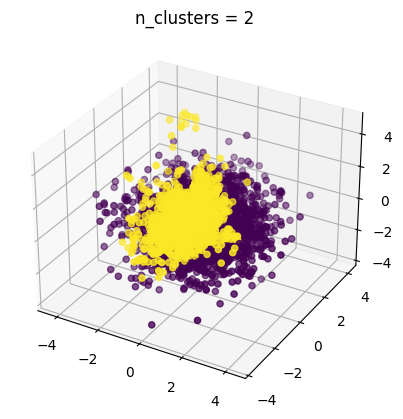

For n_clusters = 7, the silhouette score is 0.143


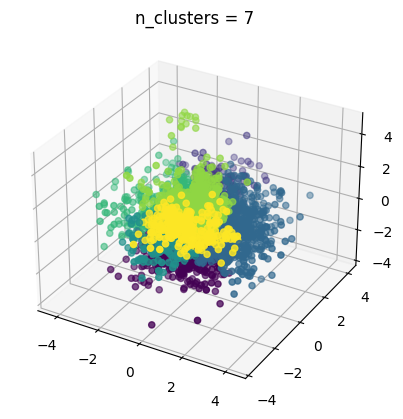

For n_clusters = 20, the silhouette score is 0.151


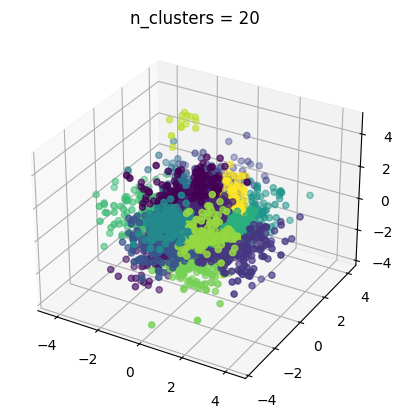

In [9]:
for n_clusters in [2, 7, 20]:
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X_train_transformed)
    
    score = silhouette_score(X_train_transformed, labels)
    
    print(f"For n_clusters = {n_clusters}, the silhouette score is {score:.3f}")
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], X_train_transformed[:, 2], c=labels)
    plt.title(f"n_clusters = {n_clusters}")
    plt.show()